## Linear Regression
### Name: Maxwell Nielsen
### Class: Section 001
### Section: Section 001
### Date: 11/7/2022

In [1]:
import numpy as np
import pandas as pd
import time
import statsmodels.api as sm
from sklearn import linear_model
from itertools import combinations
from matplotlib import pyplot as plt
from scipy import linalg as la

## Problem 1
Write a function that takes as input $X$ and **y** as defined on page 1. Call this function **ols**. This function should return the least squares estimator for $\beta$ as a numpy array.

In [2]:
def ols(X, y):
    """
    Solves for the least squares estimator.
    Add a column of 1s to X.
    Parameters:
        X: n x d numpyarray
        y: n x 1 numpyarray
    Returns:
        beta: d x 1 numpyarray
    """
    #add a column of ones to X
    m,n = X.shape
    const_col = np.ones((m,1))    
    X = np.concatenate([const_col, X], axis=1)
    
    #calculate beta
    B = la.inv((X.T@X))@X.T@y
    
    return B

## Problem 2
Find the least squares estimator for $\beta$ using this random data. 
Produce a plot showing the random data and the line of best fit determined by the least squares estimator for $\beta$. 
Your plot should include a title, axis labels, and a legend. 

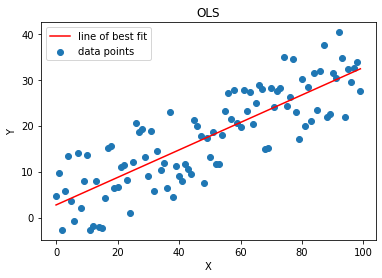

In [3]:
n = 100 # Number of points to generate
X = np.arange(100).reshape((100,1)) # The input X for the function ols
eps = np.random.uniform(-10,10, size=(100,1)) # Noise to generate random y coordinates
y = .3*X + 3 + eps # The input y for the function ols

#use our function from problem 1 to solve for the OLS solution
beta = ols(X,y)

#plot the line of best fit
plt.plot(X, beta[0] + X*beta[1], color='r', label='line of best fit')
#plot the data points
plt.scatter(X,y, label='data points')
plt.title('OLS')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Problem 3
Write a function that finds the least squares estimator for rank-deficient models using the SVD. 
The function should still take $X$ and **y** as inputs. Call the function **svd_ols** and return the least squares estimator for $\beta$ as a numpy array.

In [4]:
def svd_ols(X, y):
    """
    Solves for the least squares estimator using the SVD.
    Add a column of 1s to X.
    Parameters:
        X: n x d numpyarray
        y: n x 1 numpyarray
    Returns:
        beta: d x 1 numpy array
    """
    #add a column of ones to X
    m,n = X.shape
    const_col = np.ones((m,1))    
    X = np.concatenate([const_col, X], axis=1)
    
    #use the SVD to find the OLS solution
    U, E, V = la.svd(X, full_matrices=False)
    E_inv = np.diag(1/E)
    B = V.T @ E_inv @ U.T @ y
    return B

## Problem 4
Use your function **svd_ols** to find the least squares estimator for a cubic polynomial. 
Create a plot that shows a scatter plot of the data and a curve using the least squares estimator. 
Your plot should include a title, axis labels, and a legend.

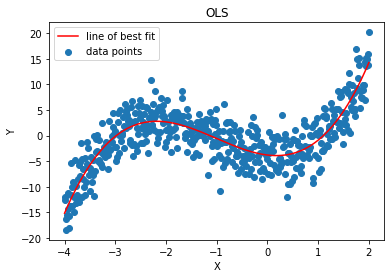

In [7]:
x = np.linspace(-4, 2, 500).reshape((500,1))
y = np.array(x**3 + 3*x**2 - x - 3.5).reshape((500,1))
eps = np.random.normal(0, 3, len(y)).reshape((500,1)) # Create noise
y += eps # Add noise to randomize data

lin_col = x
quad_col = x**2
cub_col = x**3

X = np.column_stack((lin_col, quad_col, cub_col))

#use the svd decomp to find the ols estimate
beta = svd_ols(X,y)
m,n = X.shape
const_col = np.ones((m,1))    
X = np.concatenate([const_col, X], axis=1)
#plot the line of best fit
plt.plot(x, X@beta, color='r', label='line of best fit')
#plot the data points
plt.scatter(x,y, label='data points')
plt.title('OLS')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Problem 5
The file **realestate.csv** contains transaction data from 2012-2013. 
It has columns for transaction data, house age, distance to nearest MRT station, number of convenience stores, latitude, longitude, and house price of unit area.
Each row in the array is a separate measurement.

Find the combination of variables that builds the model with the best $R^2$ value when predicting **house price of unit area**. Use statsmodels to build each model and calculate $R^2$. Use **statsmodels** to build each model and calculate $R^2$. Using the same combination of variables, time the methods **ols**, **svd_ols**, and **statsmodels** . Return a list with the first element being a tuple of times for each method and the second element being the best $R^2$ value from the first part of the problem.

In [70]:
def problem5():
    """
    Find the best R2 value using statsmodels.
    Then time ols, svd_ols, and statsmodlels.
    Returns:
        list(): a tuple of times and the best R2 value
    """
    best_r2 = -5
    best_op = None
    data = pd.read_csv("realestate.csv") # Read in data as pandas dataframe
    y = data["Y house price of unit area"] # Extract dependent variable
    X_dat = data[["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores", "X5 latitude", "X6 longitude"]] # Extract independent variables
    
    #create all possible combinations of factors
    for i in range(1, len(X_dat.columns)+1):
        ops = list(combinations(X_dat.columns, i))
        for op in ops:
            op = list(op)
            temp_X = data[op] # Extract independent variables
            X = sm.add_constant(temp_X) # Add column of 1's
            model = sm.OLS(y, X).fit() # Fit the linear regression model
            #find the best r^2 value
            cur_r2 = model.rsquared
            if cur_r2 > best_r2:
                best_r2 = cur_r2
                best_op = op
    
    #use the data that gives the best fit
    X = data[best_op]
    
    #time statsmodels
    start = time.time()
    temp_X = data[best_op] # Extract independent variables
    X = sm.add_constant(temp_X) # Add column of 1's
    model = sm.OLS(y, X).fit() # Fit the linear regression model
    smt = time.time()-start
    
    #time our ordinary ols
    start = time.time()
    ols(X,y)
    olst = time.time() - start
    
    #time our svd ols
    start = time.time()
    svd_ols(X,y)
    svdt = time.time()-start
    
    return [(smt, olst, svdt), best_r2]

In [71]:
problem5()

[(0.0010318756103515625, 0.00011301040649414062, 0.00012302398681640625),
 0.5823704472723066]

## Problem 6
Use the file **realestate.csv** and the Python Example on page 4 as a template for constructing **y** and $X$ and calculating model AIC and BIC. 
For the dependent variable, use **house price of unit area**. 
For the independent variables, use **distance to the nearest MRT station**, **number of convenience stores**, **latitude**, and **longitude**.

Find the model that has the lowest AIC and the model that has the lowest BIC. Are they the same model? Print the features of the model with the lowest AIC as a list.

In [81]:
    best_aic = np.inf
    best_bic = np.inf
    
    data = pd.read_csv("realestate.csv") # Read in data as pandas dataframe
    y = data["Y house price of unit area"] # Extract dependent variable
    X_dat = data[["X3 distance to the nearest MRT station", "X4 number of convenience stores", "X5 latitude", "X6 longitude"]] # Extract independent variables
    
     #create all possible combinations of factors
    for i in range(1, len(X_dat.columns)+1):
        ops = list(combinations(X_dat.columns, i))
        for op in ops:
            op = list(op)
            temp_X = data[op] # Extract independent variables
            X = sm.add_constant(temp_X) # Add column of 1's
            model = sm.OLS(y, X).fit() # Fit the linear regression model
            #find AIC and BIC
            cur_aic = model.aic
            cur_bic = model.bic
            
            #see if the current option offers the lowest aic or bic
            if  cur_aic < best_aic:
                best_aic = cur_aic
                best_aic_op = op
            if cur_bic < best_bic:
                best_bic = cur_bic
                best_bic_op = op
    
    #see if the models given by optimizing aic and bic are the same
    print("The claim that the lowest aic model and lowest bic model are the same is "+ str(best_bic_op == best_aic_op), '\n')
    
    #print the features of the model with the best aic
    print('The features of the model with the lowest aic are:', best_aic_op)
    
    
    

The claim that the lowest aic model and lowest bic model are the same is True 

The features of the model with the lowest aic are: ['X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude']


## Problem 7
Use Ridge and Lasso Regression to model **house price of unit area** from the file **realestate.csv**.
Before fitting each model, run a GridSearch on $\alpha$ to find the optimal value.
Then use the optimal $\alpha$ to fit the model.
Once you have fit the model, you can use the **score** method to get $R^2$. 
Print $R^2$ for each model as a tuple. 
How do these models compare to the models in problem 6?

In [99]:
data = pd.read_csv("realestate.csv") # Read in data as pandas dataframe
y = data["Y house price of unit area"] # Extract dependent variable
X_dat = data[["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores", "X5 latitude", "X6 longitude"]] # Extract independent variables

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13)) # Range for grid search
reg.fit(X_dat, y) # Fit the model
ra = reg.alpha_ # Best parameter value
ridger = reg.score(X_dat,y)

reg1 = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13)) # Range for grid search
reg1.fit(X_dat, y) # Fit the model
la = reg1.alpha_ # Best parameter value
lassor = reg1.score(X_dat,y)

print('The optimal alphas for ridge and lasso are', ra, 'and', la, 'respectively.', '\n')
print('The r squared values for ridge and lasso respectively in a tuple are', (ridger, lassor), '\n')
print('By looking at the coefficients of each method, we see that each regularization method chose to include all '
          'x variables, which is a little different from problem 6 where the model only chose to include three variables, but the same as problem 5.')

The optimal alphas for ridge and lasso are 0.001 and 0.001 respectively. 

The r squared values for ridge and lasso respectively in a tuple are (0.5823546186076589, 0.5822617746792997) 

By looking at the coefficients of each method, we see that each regularization method chose to include all x variables, which is a little different from problem 6 where the model only chose to include three variables, but the same as problem 5.
